# Heart Disease Prediction Sytsem Using Machin Learning


In [1]:
# Import necessary libraries
import os
import tarfile
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import  RFE, SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from six.moves import urllib

In [2]:
# Load heart data from CSV file into a DataFrame called 'heart_data'
heart_data = pd.read_csv('heart.csv')

In [3]:
heart_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
# get more information about the data set
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
# Count: Number of non-null observations in each column.
# Mean: Average value of each column, indicating the central tendency.
# Std: Standard deviation, a measure of the dispersion or spread of values around the mean.
# Min: Minimum value observed in each column.
# 25%: First quartile, or the value below which 25% of the data falls.
# 50%: Median, or the middle value of the dataset.
# 75%: Third quartile, or the value below which 75% of the data falls.
# Max: Maximum value observed in each column.
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


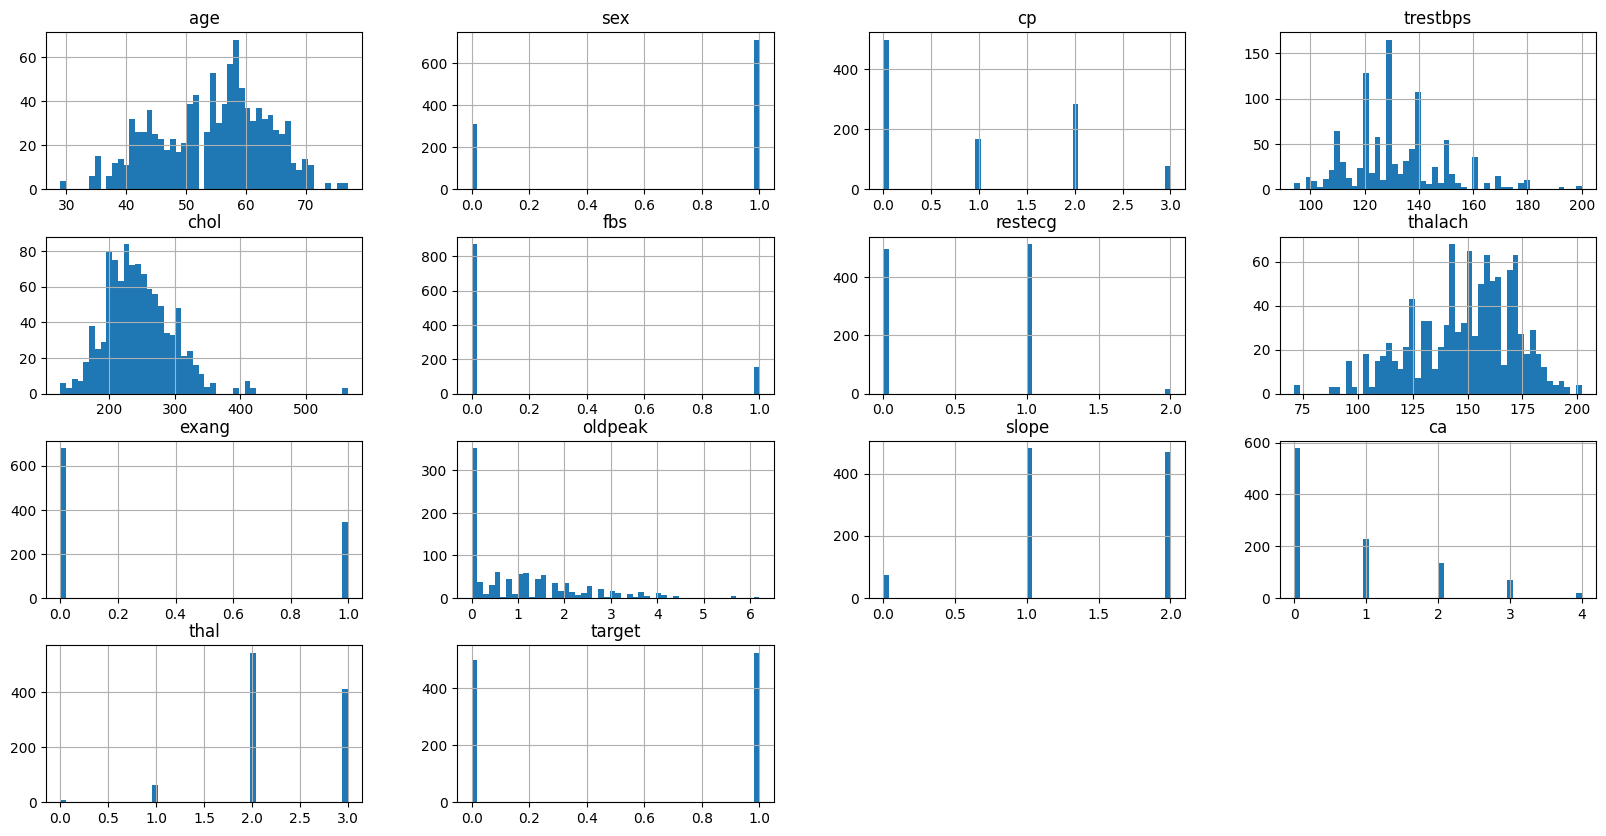

In [6]:
# %matplotlib inline: Display plots inline in Jupyter Notebook.
import matplotlib.pyplot as plt  # Import the matplotlib library.
heart_data.hist(bins=50, figsize=(20,10))  # Generate histograms for each numerical column.
plt.show()  # Show the histograms.

In [7]:
# Retrieve the shape of the 'heart_data' DataFrame
heart_data.shape

(1025, 14)

In [4]:
from sklearn.model_selection import train_test_split
 
training_set, test_set = train_test_split(heart_data, test_size=0.2, random_state=42)

In [7]:
training_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2,0
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2,1
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2,1


# Explotary Data Anlysis

In [8]:
# This line of code appears to be using the .isnull() method on the 'heart_data' DataFrame to check for missing values, 
training_set.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#Correlation between other attribute

In [9]:
corr_metrix=training_set.corr()

In [10]:
corr_metrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-8.357147e-02,-0.084905,0.293481,0.238369,1.453565e-01,-0.128395,-0.389712,0.092714,0.210160,-0.170200,0.282671,0.063674,-0.238202
sex,-0.083571,1.000000e+00,-0.042775,-0.080829,-0.177799,1.279991e-17,-0.071557,-0.049661,0.116992,0.094040,-0.001314,0.127984,0.176253,-0.266786
cp,-0.084905,-4.277526e-02,1.000000,0.035681,-0.104164,5.548387e-02,0.049478,0.311439,-0.391434,-0.153492,0.106552,-0.178762,-0.159676,0.432445
trestbps,0.293481,-8.082861e-02,0.035681,1.000000,0.153424,1.720633e-01,-0.114571,-0.039952,0.045454,0.169733,-0.116131,0.103391,0.055667,-0.137262
chol,0.238369,-1.777986e-01,-0.104164,0.153424,1.000000,6.088032e-02,-0.147512,-0.033765,0.095113,0.027657,0.004554,0.076479,0.098206,-0.132718
fbs,0.145356,1.279991e-17,0.055484,0.172063,0.060880,1.000000e+00,-0.106767,-0.017339,0.033279,0.006870,-0.043616,0.149455,-0.014352,-0.047655
restecg,-0.128395,-7.155669e-02,0.049478,-0.114571,-0.147512,-1.067669e-01,1.000000,0.039544,-0.063253,-0.053344,0.080837,-0.087017,-0.023967,0.121280
thalach,-0.389712,-4.966140e-02,0.311439,-0.039952,-0.033765,-1.733865e-02,0.039544,1.000000,-0.367464,-0.354190,0.397207,-0.219126,-0.121331,0.438070
exang,0.092714,1.169920e-01,-0.391434,0.045454,0.095113,3.327881e-02,-0.063253,-0.367464,1.000000,0.291312,-0.228310,0.102570,0.211592,-0.425967
oldpeak,0.210160,9.404025e-02,-0.153492,0.169733,0.027657,6.870026e-03,-0.053344,-0.354190,0.291312,1.000000,-0.543558,0.209130,0.196596,-0.450257


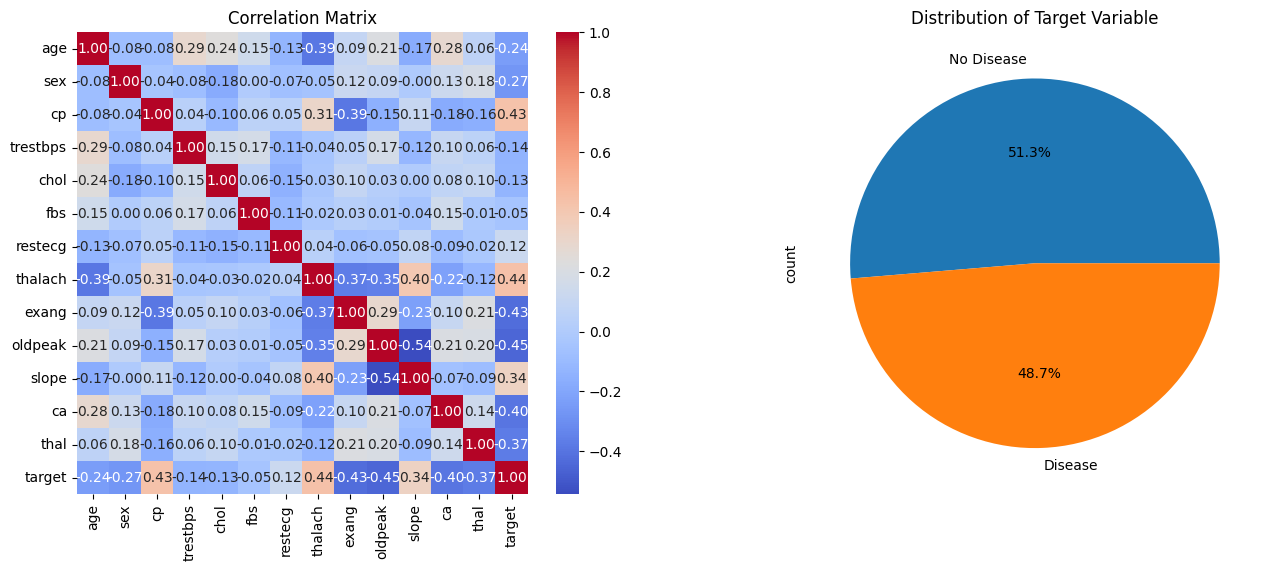

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming heart_data is your DataFrame
# Calculate correlation matrix
correlation_matrix = training_set.corr()

# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title('Correlation Matrix')

# Pie plot for distribution of target variable (assuming it's named 'target')
heart_data['target'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1], labels=['No Disease', 'Disease'])
axes[1].set_title('Distribution of Target Variable')

plt.show()

In [14]:
corr_metrix["target"].sort_values(ascending=False)

target      1.000000
thalach     0.438070
cp          0.432445
slope       0.335027
restecg     0.121280
fbs        -0.047655
chol       -0.132718
trestbps   -0.137262
age        -0.238202
sex        -0.266786
thal       -0.368819
ca         -0.395357
exang      -0.425967
oldpeak    -0.450257
Name: target, dtype: float64

              age         sex          cp    trestbps        chol         fbs  \
count  820.000000  820.000000  820.000000  820.000000  820.000000  820.000000   
mean    54.367073    0.700000    0.952439  131.724390  245.051220    0.146341   
std      9.166917    0.458537    1.039598   17.618454   49.668373    0.353664   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.000000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  820.000000  820.000000  820.000000  820.000000  820.000000  820.000000   
mean     0.519512  149.351220    0.345122    1.040244    1.389024    0.751220   
std      0.528420   22.9276

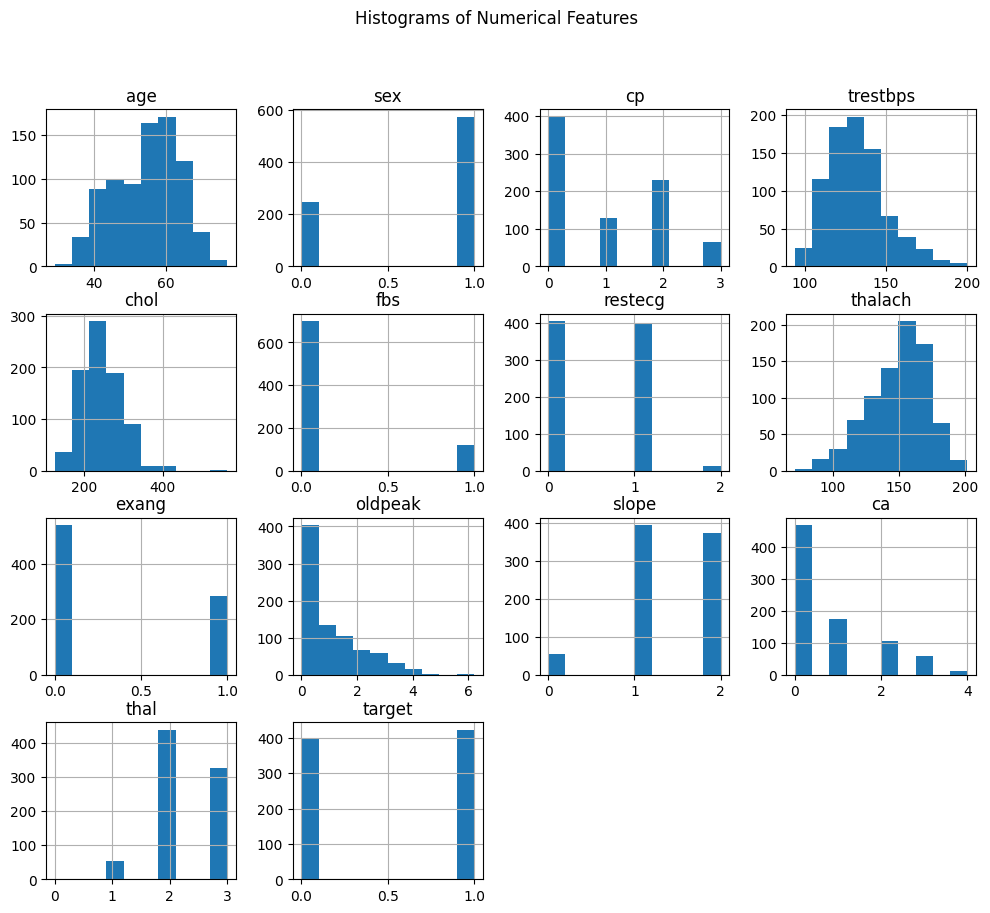

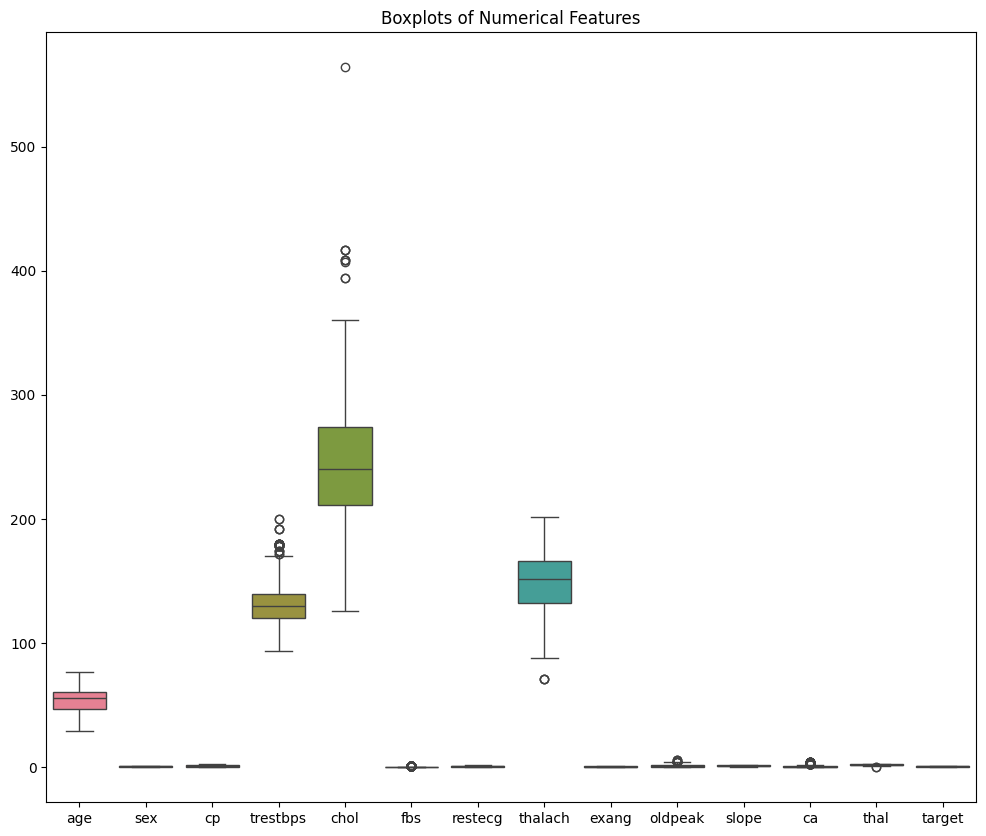

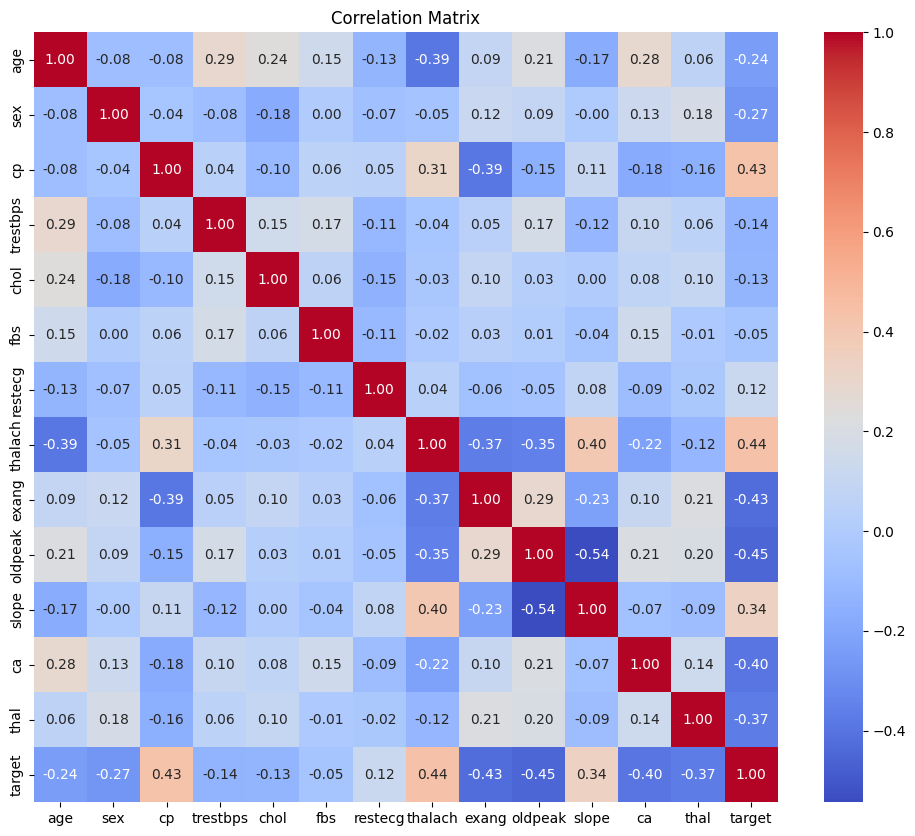

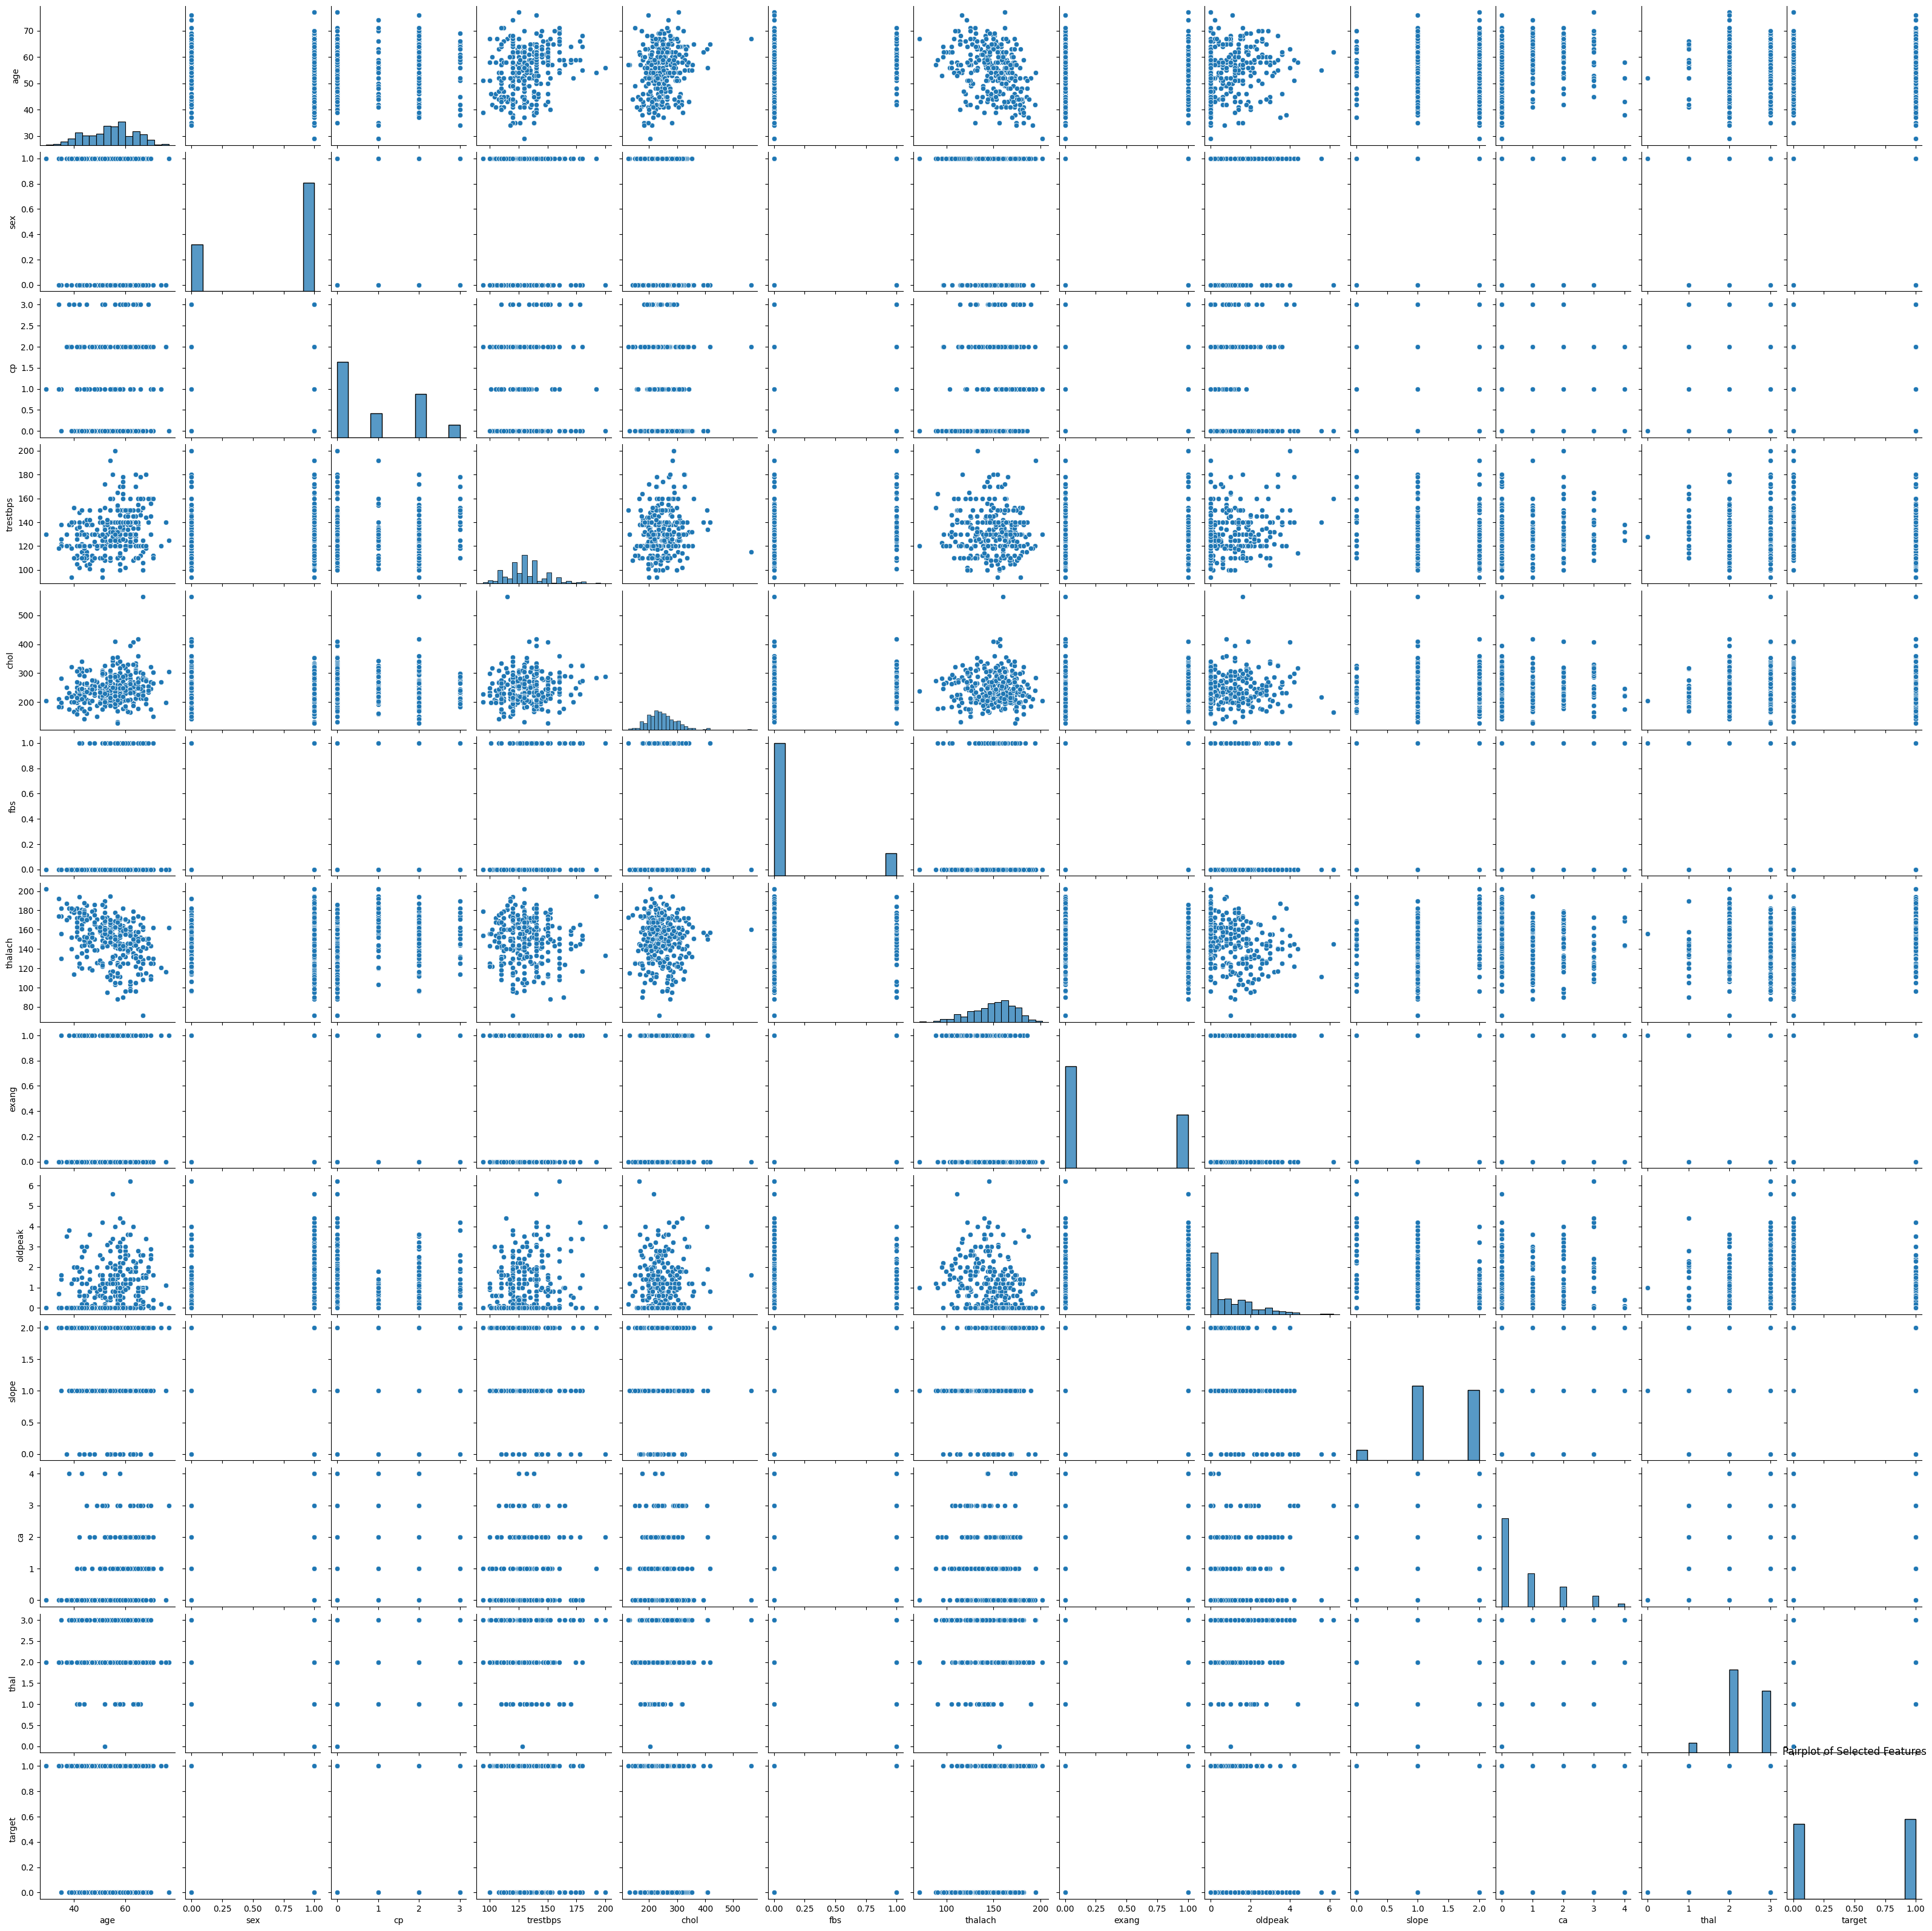

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary Statistics
print(training_set.describe())

# Histograms for numerical features
training_set.hist(figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Boxplots for numerical features
plt.figure(figsize=(12, 10))
sns.boxplot(data=training_set)
plt.title('Boxplots of Numerical Features')
plt.show()

# Correlation Matrix
correlation_matrix = training_set.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Pairplot for selected features
selected_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
sns.pairplot(training_set[selected_features])
plt.title('Pairplot of Selected Features')
plt.show()

<Figure size 1000x600 with 0 Axes>

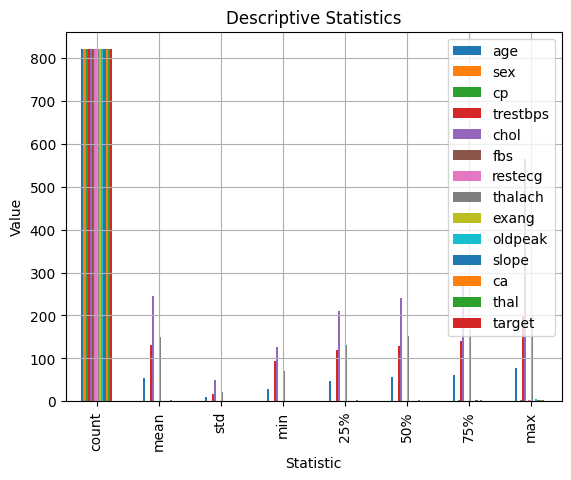

In [17]:
import matplotlib.pyplot as plt

# Generate descriptive statistics
description = training_set.describe()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
description.plot(kind='bar')
plt.title('Descriptive Statistics')
plt.ylabel('Value')
plt.xlabel('Statistic')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [18]:
# This line of code is using the value_counts() method on the 'target' column of the 'heart_data' DataFrame.
# It counts the occurrences of each unique value in the 'target' column and returns a Series object 
# with the counts of each unique value.
training_set['target'].value_counts()

target
1    423
0    397
Name: count, dtype: int64

In [19]:
# Assigning input features to variable X by dropping the 'target' column from the 'heart_data' DataFrame
# axis=1 specifies that we are dropping a column
X = training_set.drop(columns='target', axis=1)

# Assigning the target variable to variable Y
Y = training_set['target']

In [20]:
# Printing the input features (X) DataFrame
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
835   49    1   2       118   149    0        0      126      0      0.8   
137   64    0   0       180   325    0        1      154      1      0.0   
534   54    0   2       108   267    0        0      167      0      0.0   
495   59    1   0       135   234    0        1      161      0      0.5   
244   51    1   2       125   245    1        0      166      0      2.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
700   41    1   2       130   214    0        0      168      0      2.0   
71    61    1   0       140   207    0        0      138      1      1.9   
106   51    1   0       140   299    0        1      173      1      1.6   
270   43    1   0       110   211    0        1      161      0      0.0   
860   52    1   0       112   230    0        1      160      0      0.0   

     slope  ca  thal  
835      2   3     2  
137      2   0     2  
534      2   0    

# Logistic Regression

In [21]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets for both input features (X) and target variable (Y)
# X_train: Training input features
# X_test: Testing input features
# Y_train: Training target variable
# Y_test: Testing target variable
# test_size=0.2: Specifies that 20% of the data will be used for testing, and the rest will be used for training
# stratify=Y: Ensures that the distribution of classes in the target variable Y is preserved in both the training and testing sets
# random_state=2: Provides a seed for random number generation to ensure reproducibility of the split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [22]:
# Printing the shapes of the original input features (X), training input features (X_train), and testing input features (X_test)
print(X.shape, X_train.shape, X_test.shape)

(820, 13) (656, 13) (164, 13)


In [23]:
from sklearn.metrics import mean_squared_error

# Logistic Regression
model = LogisticRegression()  # Initialize Logistic Regression model
model.fit(X_train, Y_train)  # Train Logistic Regression model
Y_pred_logreg = model.predict(X_test)  # Predict using Logistic Regression model
logreg_accuracy = accuracy_score(Y_test, Y_pred_logreg)  # Calculate accuracy of Logistic Regression model
logreg_mse = mean_squared_error(Y_test, Y_pred_logreg)  # Calculate MSE of Logistic Regression model
logreg_rmse = np.sqrt(logreg_mse)  # Calculate RMSE of Logistic Regression model
print("Logistic Regression Accuracy:", logreg_accuracy)  # Print accuracy of Logistic Regression model
print("Logistic Regression Mean Squared Error (MSE):", logreg_mse)  # Print MSE of Logistic Regression model
print("Logistic Regression Root Mean Squared Error (RMSE):", logreg_rmse)  # Print RMSE of Logistic Regression model


Logistic Regression Accuracy: 0.8536585365853658
Logistic Regression Mean Squared Error (MSE): 0.14634146341463414
Logistic Regression Root Mean Squared Error (RMSE): 0.38254602783800296


C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
# Predicting the target values for the training data using the trained model.
X_train_prediction = model.predict(X_train)

# Calculating the accuracy of the model's predictions on the training data.
# This is done by comparing the predicted values (X_train_prediction) with the actual target values (Y_train).
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [25]:
# Printing the accuracy of the model's predictions on the training data.
# This provides a measure of how well the model is performing on the data it was trained on.
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8673780487804879


In [26]:
# Predicting the target values for the test data using the trained model.
X_test_prediction = model.predict(X_test)

# Calculating the accuracy of the model's predictions on the test data.
# This is done by comparing the predicted values (X_test_prediction) with the actual target values (Y_test).
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [27]:
# Printing the accuracy of the model's predictions on the test data.
# This provides insight into how well the model generalizes to unseen data, giving an indication of its performance in real-world scenarios.
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8536585365853658


# Random Forest

In [28]:
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np

# Random Forest Classifier
model2 = RandomForestClassifier(n_estimators=200, max_depth=50, min_samples_split=400, random_state=42)
model2.fit(X_train, Y_train)
rf_test_pred = model2.predict(X_test)
rf_test_accuracy = accuracy_score(Y_test, rf_test_pred)
rf_mse = mean_squared_error(Y_test, rf_test_pred)
rf_rmse = np.sqrt(rf_mse)

# Print Random Forest Results
print("Random Forest validation accuracy:", rf_test_accuracy)
print(f"Random Forest Mean Squared Error (MSE): {rf_mse:.4f}")
print(f"Random Forest Root Mean Squared Error (RMSE): {rf_rmse:.4f}")


Random Forest validation accuracy: 0.8292682926829268
Random Forest Mean Squared Error (MSE): 0.1707
Random Forest Root Mean Squared Error (RMSE): 0.4132


In [29]:
from sklearn.metrics import accuracy_score

# Predicting the target values for the training data using the trained model.
X_train_prediction = model2.predict(X_train)

# Calculating the accuracy of the model's predictions on the training data.
# This is done by comparing the predicted values (X_train_prediction) with the actual target values (Y_train).
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [30]:
# Predicting the target values for the test data using the trained model.
X_test_prediction = model2.predict(X_test)

# Calculating the accuracy of the model's predictions on the test data.
# This is done by comparing the predicted values (X_test_prediction) with the actual target values (Y_test).
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [31]:
# Printing the accuracy of the model's predictions on the training data.
# This provides a measure of how well the model is performing on the data it was trained on.
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8414634146341463


In [32]:
# Printing the accuracy of the model's predictions on the test data.
# This provides insight into how well the model generalizes to unseen data, giving an indication of its performance in real-world scenarios.
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8292682926829268


# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np

# Decision Tree Classifier
model3 = DecisionTreeClassifier(max_depth=50, min_samples_split=400, random_state=42)
model3.fit(X_train, Y_train)
dt_test_pred = model3.predict(X_test)
dt_test_accuracy = accuracy_score(Y_test, dt_test_pred)
dt_mse = mean_squared_error(Y_test, dt_test_pred)
dt_rmse = np.sqrt(dt_mse)

# Print Decision Tree Results
print("Decision Tree validation accuracy:", dt_test_accuracy)
print(f"Decision Tree Mean Squared Error (MSE): {dt_mse:.4f}")
print(f"Decision Tree Root Mean Squared Error (RMSE): {dt_rmse:.4f}")

Decision Tree validation accuracy: 0.7317073170731707
Decision Tree Mean Squared Error (MSE): 0.2683
Decision Tree Root Mean Squared Error (RMSE): 0.5180


In [34]:
# Predicting the target values for the training data using the trained model.
X_train_prediction = model3.predict(X_train)

# Calculating the accuracy of the model's predictions on the training data.
# This is done by comparing the predicted values (X_train_prediction) with the actual target values (Y_train).
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [35]:
# Printing the accuracy of the model's predictions on the training data.
# This provides a measure of how well the model is performing on the data it was trained on.
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.7698170731707317


In [36]:
# Predicting the target values for the test data using the trained model.
X_test_prediction = model3.predict(X_test)

# Calculating the accuracy of the model's predictions on the test data.
# This is done by comparing the predicted values (X_test_prediction) with the actual target values (Y_test).
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [37]:
# Printing the accuracy of the model's predictions on the test data.
# This provides insight into how well the model generalizes to unseen data, giving an indication of its performance in real-world scenarios.
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7317073170731707


In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
model1 = LogisticRegression()
lr_cv_scores = cross_val_score(model1, X, Y, cv=5)  # 5-fold cross-validation
lr_mean_accuracy = lr_cv_scores.mean()

# Decision Tree
model2 = DecisionTreeClassifier(max_depth=50, min_samples_split=400, random_state=42)
dt_cv_scores = cross_val_score(model2, X, Y, cv=5)  # 5-fold cross-validation
dt_mean_accuracy = dt_cv_scores.mean()

# Random Forest
model3 = RandomForestClassifier(n_estimators=200, max_depth=50, min_samples_split=400, random_state=42)
rf_cv_scores = cross_val_score(model3, X, Y, cv=5)  # 5-fold cross-validation
rf_mean_accuracy = rf_cv_scores.mean()

# Print Cross-Validation Results in the correct order
print("Logistic Regression Cross-Validation Mean Accuracy:", lr_mean_accuracy)
print("Decision Tree Cross-Validation Mean Accuracy:", dt_mean_accuracy)
print("Random Forest Cross-Validation Mean Accuracy:", rf_mean_accuracy)

C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Logistic Regression Cross-Validation Mean Accuracy: 0.853658536585366
Decision Tree Cross-Validation Mean Accuracy: 0.7621951219512195
Random Forest Cross-Validation Mean Accuracy: 0.8524390243902438


# Hyper Parameter Tuning

In [39]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression Hyperparameter Tuning
lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}  # Define hyperparameter grid
lr_model = LogisticRegression()  # Define logistic regression model
lr_grid_search = GridSearchCV(model, lr_param_grid, cv=5)  # Perform grid search with 5-fold cross-validation
lr_grid_search.fit(X_train, Y_train)  # Fit grid search on training data
best_lr_model = lr_grid_search.best_estimator_  # Get best logistic regression model
best_lr_params = lr_grid_search.best_params_  # Get best parameters
lr_accuracy = best_lr_model.score(X_test, Y_test)  # Evaluate best model on test data

# Decision Tree Hyperparameter Tuning
dt_param_grid = {'max_depth': [10, 20, 30, 40, 50], 'min_samples_split': [100, 200, 300, 400, 500]}  # Define hyperparameter grid
dt_model = DecisionTreeClassifier(random_state=42)  # Define decision tree model
dt_grid_search = GridSearchCV(model2, dt_param_grid, cv=5)  # Perform grid search with 5-fold cross-validation
dt_grid_search.fit(X_train, Y_train)  # Fit grid search on training data
best_dt_model = dt_grid_search.best_estimator_  # Get best decision tree model
best_dt_params = dt_grid_search.best_params_  # Get best parameters
dt_accuracy = best_dt_model.score(X_test, Y_test)  # Evaluate best model on test data

# Random Forest Hyperparameter Tuning
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30, 40, 50], 'min_samples_split': [100, 200, 300, 400, 500]}  # Define hyperparameter grid
rf_model = RandomForestClassifier(random_state=42)  # Define random forest model
rf_grid_search = GridSearchCV(model3, rf_param_grid, cv=5)  # Perform grid search with 5-fold cross-validation
rf_grid_search.fit(X_train, Y_train)  # Fit grid search on training data
best_rf_model = rf_grid_search.best_estimator_  # Get best random forest model
best_rf_params = rf_grid_search.best_params_  # Get best parameters
rf_accuracy = best_rf_model.score(X_test, Y_test)  # Evaluate best model on test data

# Print Hyperparameter Tuning Results
print("Logistic Regression Best Parameters:", best_lr_params)
print("Logistic Regression Test Accuracy with Best Parameters:", lr_accuracy)
print("Decision Tree Best Parameters:", best_dt_params)
print("Decision Tree Test Accuracy with Best Parameters:", dt_accuracy)
print("Random Forest Best Parameters:", best_rf_params)
print("Random Forest Test Accuracy with Best Parameters:", rf_accuracy)


C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Logistic Regression Best Parameters: {'C': 100}
Logistic Regression Test Accuracy with Best Parameters: 0.8414634146341463
Decision Tree Best Parameters: {'max_depth': 10, 'min_samples_split': 100}
Decision Tree Test Accuracy with Best Parameters: 0.8109756097560976
Random Forest Best Parameters: {'max_depth': 10, 'min_samples_split': 100, 'n_estimators': 300}
Random Forest Test Accuracy with Best Parameters: 0.8536585365853658


In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_model(model, X_test, Y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    confusion_mat = confusion_matrix(Y_test, predictions)
    class_report = classification_report(Y_test, predictions)
    return accuracy, precision, recall, f1, confusion_mat, class_report

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Logistic Regression Hyperparameter Tuning
lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
lr_grid_search = GridSearchCV(LogisticRegression(), lr_param_grid, cv=5)
lr_grid_search.fit(X_train, Y_train)
best_lr_model = lr_grid_search.best_estimator_

# Decision Tree Hyperparameter Tuning
dt_param_grid = {'max_depth': [10, 20, 30, 40, 50], 'min_samples_split': [100, 200, 300, 400, 500]}
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5)
dt_grid_search.fit(X_train, Y_train)
best_dt_model = dt_grid_search.best_estimator_

# Random Forest Hyperparameter Tuning
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30, 40, 50], 'min_samples_split': [100, 200, 300, 400, 500]}
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5)
rf_grid_search.fit(X_train, Y_train)
best_rf_model = rf_grid_search.best_estimator_

# Evaluate models
lr_accuracy, lr_precision, lr_recall, lr_f1, lr_confusion_matrix, lr_classification_report = evaluate_model(best_lr_model, X_test, Y_test)
dt_accuracy, dt_precision, dt_recall, dt_f1, dt_confusion_matrix, dt_classification_report = evaluate_model(best_dt_model, X_test, Y_test)
rf_accuracy, rf_precision, rf_recall, rf_f1, rf_confusion_matrix, rf_classification_report = evaluate_model(best_rf_model, X_test, Y_test)

# Print evaluation metrics
print("Logistic Regression Evaluation:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1-score:", lr_f1)
print("Confusion Matrix:\n", lr_confusion_matrix)
print("Classification Report:\n", lr_classification_report)

print("\nDecision Tree Evaluation:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-score:", dt_f1)
print("Confusion Matrix:\n", dt_confusion_matrix)
print("Classification Report:\n", dt_classification_report)

print("\nRandom Forest Evaluation:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
print("Confusion Matrix:\n", rf_confusion_matrix)
print("Classification Report:\n", rf_classification_report)


C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Logistic Regression Evaluation:
Accuracy: 0.8963414634146342
Precision: 0.845360824742268
Recall: 0.9761904761904762
F1-score: 0.9060773480662984
Confusion Matrix:
 [[65 15]
 [ 2 82]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.81      0.88        80
           1       0.85      0.98      0.91        84

    accuracy                           0.90       164
   macro avg       0.91      0.89      0.90       164
weighted avg       0.91      0.90      0.90       164


Decision Tree Evaluation:
Accuracy: 0.8292682926829268
Precision: 0.8414634146341463
Recall: 0.8214285714285714
F1-score: 0.8313253012048193
Confusion Matrix:
 [[67 13]
 [15 69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        80
           1       0.84      0.82      0.83        84

    accuracy                           0.83       164
   macro avg       0.83      0.83      0.83

In [44]:
test_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
527,62,0,0,124,209,0,1,163,0,0.0,2,0,2,1
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
621,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0


In [47]:
test_data=test_set.drop("target",axis=1) 

In [49]:
test_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [50]:
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
527,62,0,0,124,209,0,1,163,0,0.0,2,0,2
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2
621,48,1,0,130,256,1,0,150,1,0.0,2,2,3


In [53]:
input_data = (62	,0	,0	,124,	209,	0,	1,	163	,0,	0.0,	2,	0	,2)

In [54]:
import numpy as np

# Assuming 'input_data' is your input data and 'model3' is your trained DecisionTreeClassifier model

# Convert input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape input data
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Check if model is fitted
if hasattr(model, 'fit'):
    # Fit the model
    model2.fit(X_train, Y_train)
    
    # Make predictions
    prediction = model.predict(input_data_reshaped)
    
    # Print prediction
    print(prediction)
    
    # Check prediction and print result
    if prediction[0] == 0:
        print('The Person does not have a Heart Disease')
    else:
        print('The Person has Heart Disease')
else:
    print("Error: Model has not been fitted.")

[1]
The Person has Heart Disease


C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
	
62,	66	,0,	2,	146,	278	,0	,0,	152,	0	,0	,1,	1,	2